In [1]:
import sys
sys.path.append("..")
# sys.path.append("..")

In [2]:
from matplotlib import cm,use
import math
import time
from pupil_analysis_func import Main
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import analysis_utils as utils
from copy import deepcopy as copy
from behaviour_analysis import TDAnalysis
import math
import pickle
from datetime import datetime, timedelta
from scipy.signal import find_peaks, find_peaks_cwt
from pupil_analysis_func import batch_analysis, plot_traces, get_subset, glm_from_baseline, PupilEventConditions
from plotting_functions import plot_sound_vbars
from pathlib import Path
from scipy.stats import sem

<Figure size 640x480 with 0 Axes>

In [3]:
# pkldir = Path(r'D:\bonsai\offline_data')
pkldir = Path(r'X:\Dammy\mouse_pupillometry\pickles')
pkl2use = os.path.join(pkldir,'mouse_hf_2305_batch_no_canny_fam_2d_90Hz_hpass01_lpass4hanning015_TOM.pkl')
run = Main(pkl2use, (-1.0, 3.0), figdir=rf'figures',fig_ow=False)
pmetric2use = ['diameter_2d_zscored','dlc_radii_a_zscored','dlc_EW_zscored','dlc_EW_normed']
for sess in run.data:
    run.data[sess].trialData['Offset'] = run.data[sess].trialData['Offset'].astype(float) + 0.0
run.add_stage3_05_order()
run.add_pretone_dt()
run.add_rolling_mean('Tone_Position',10)
run.add_01_1st_flag()

In [15]:
run.animals

AttributeError: 'Main' object has no attribute 'animals'

In [4]:
condition_keys = ['p_rate', 'p_rate_ctrl', 'p_onset', 'alt_rand', 'alt_rand_ctrl', 'pat_nonpatt_2X', 'p_rate_fm','p_rate_local']
aligned_pklfile = pkldir/r'mouse_hf_2305_batch_no_canny_fam_hpass015_240219.pkl'
aligned_ow = False
conditions_class = PupilEventConditions()
list_cond_filts = conditions_class.all_filts
stages = [3]

if os.path.isfile(aligned_pklfile) and aligned_ow is False:
    with open(aligned_pklfile,'rb') as pklfile:
        run.aligned = pickle.load(pklfile)

        keys = [[e] for e in run.aligned.keys()]
else:
    conditions_class.get_condition_dict(run, condition_keys,stages,)  # 'a1'
    # conditions_class.get_condition_dict(run, condition_keys, stages,
    #                                     pmetric2use='canny_raddi_a_zscored', key_suffix='_canny')

with open(aligned_pklfile, 'wb') as pklfile:
    pickle.dump(run.aligned,pklfile)

In [5]:
run.aligned

{'p_rate': (<Figure size 800x600 with 1 Axes>,
  <Axes: title={'center': 'Pupil size aligned to ToneTime'}, xlabel='Time since ToneTime', ylabel='zcscored pupil size'>,
  [                                           -1.000000  -0.988950  -0.977901  \
   time                          name date                                      
   2023-05-31 11:51:48.425868800 DO64 230531  -0.210695  -0.206237  -0.199692   
   2023-05-31 11:54:22.584985600 DO64 230531   0.524824   0.519240   0.514271   
   2023-05-31 11:55:42.135232000 DO64 230531  -0.304537  -0.304238  -0.305837   
   2023-05-31 11:56:52.881152000 DO64 230531   0.247837   0.243225   0.238207   
   2023-05-31 11:59:48.618444800 DO64 230531  -0.137663  -0.131787  -0.125728   
   ...                                              ...        ...        ...   
   2023-07-25 15:29:53.162265600 DO70 230725  -0.160526  -0.167022  -0.170711   
   2023-07-25 15:42:57.204582400 DO70 230725  -0.316628  -0.336919  -0.355301   
   2023-07-25 15:49:0

In [6]:
p_rate_dates= [
            '230531',
            '230601',
            '230602',
            '230605',
            '230606',
            '230607',
            # '230608',   # muscimol day (64, 69)
            '230609',
            '230717',
            '230718',
            # '230719',  # muscimol day 2 0.5 uL dose (64,69,70)
            '230720',
            '230721',
            '230724',
            '230725',
            # '230804',  # muscimol 1 ul/ul
            ]

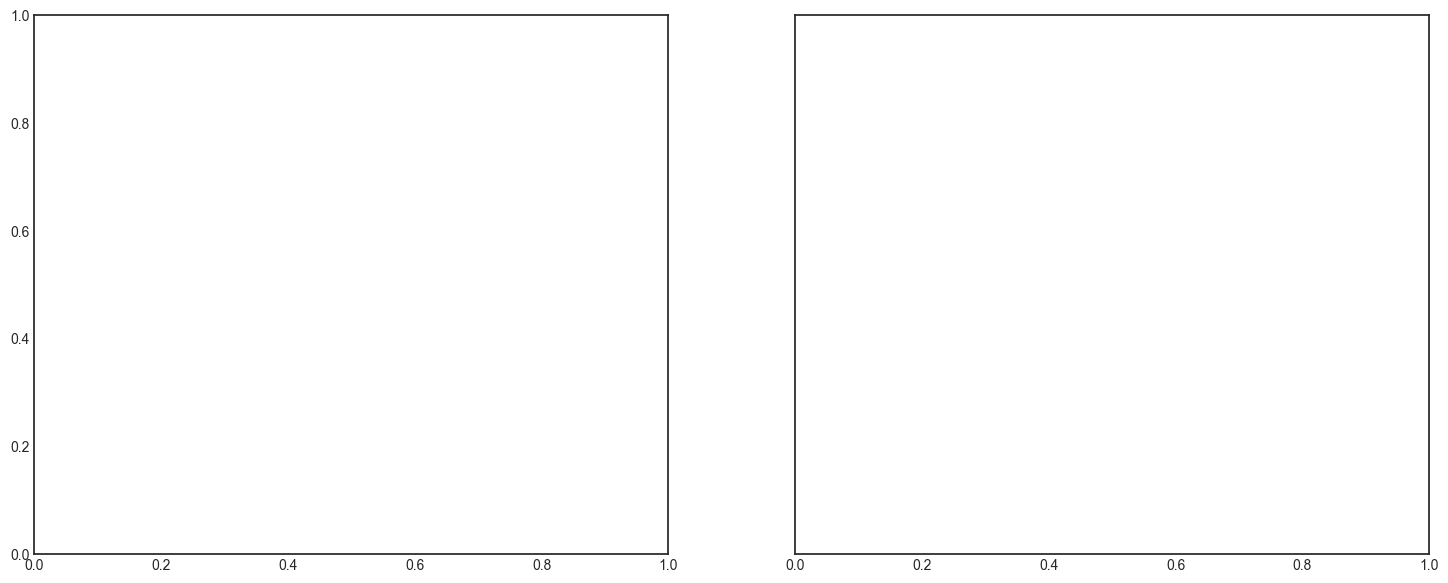

In [7]:
rare_vs_freq_first_plot = plt.subplots(ncols=2, sharey='all',figsize=(18,7))

In [8]:
p_rate_dates_01_first = []
for sessname in run.data:
    # print(run.data[sessname].trialData['01_first'][0])
    if run.data[sessname].trialData['01_first'][0] == 1:
        p_rate_dates_01_first.append(sessname.split('_')[1])
fig,ax,_,_= get_subset(run,run.aligned,'p_rate_local',{'date':p_rate_dates_01_first}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none'],
                       pltaxis=(rare_vs_freq_first_plot[0],rare_vs_freq_first_plot[1][0])
                                                    )
ax.set_title('Frequent first')
plot_sound_vbars(ax)

length input lists 3


In [9]:
p_rate_dates_09_first = []
for sessname in run.data:
    # print(run.data[sessname].trialData['01_first'][0])
    if run.data[sessname].trialData['01_first'][0] == 0:
        p_rate_dates_09_first.append(sessname.split('_')[1])
fig,ax,_,_= get_subset(run,run.aligned,'p_rate_local',{'date':p_rate_dates_09_first}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none'],
                       pltaxis=(rare_vs_freq_first_plot[0],rare_vs_freq_first_plot[1][1])
                                                    )
ax.set_title('Rare first')
plot_sound_vbars(ax)

length input lists 3


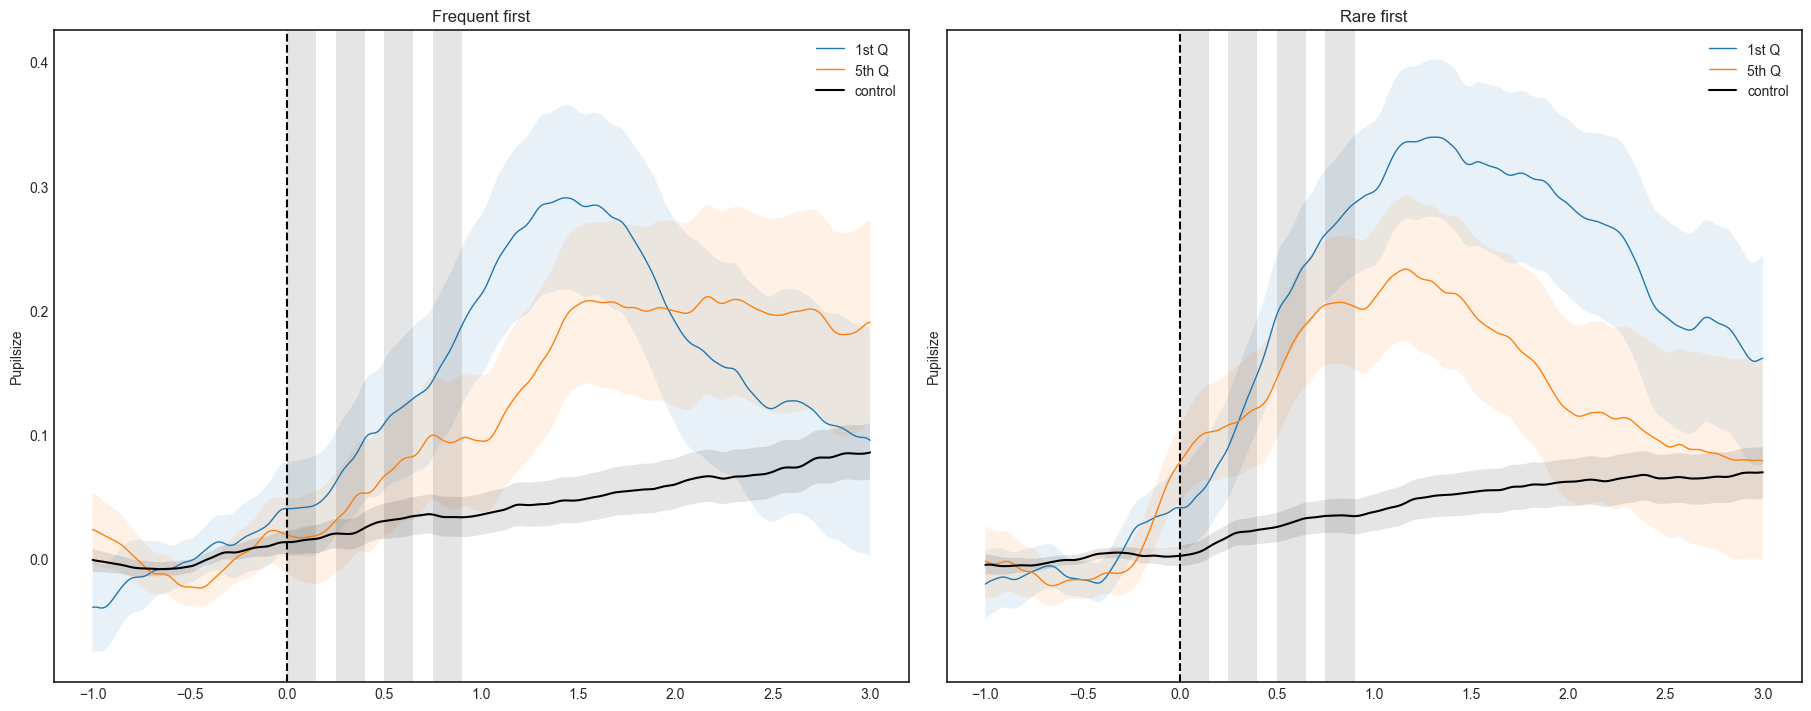

In [10]:
rare_vs_freq_first_plot[0].set_constrained_layout('constrained')
rare_vs_freq_first_plot[0]

length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3
length input lists 3


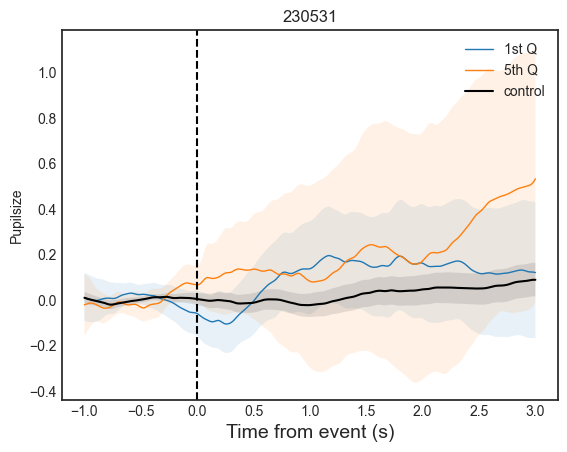

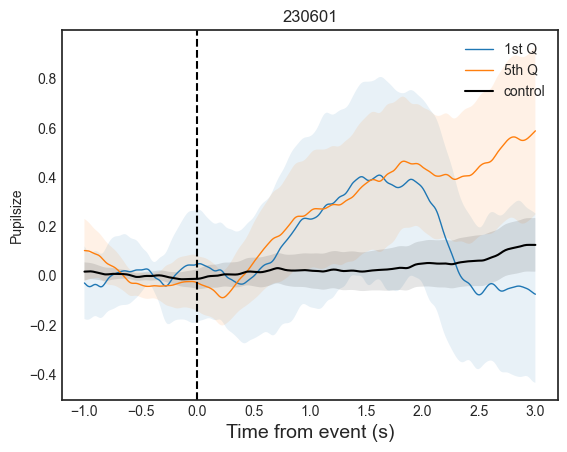

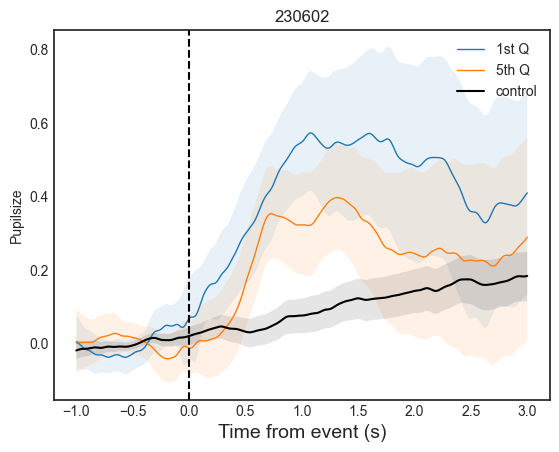

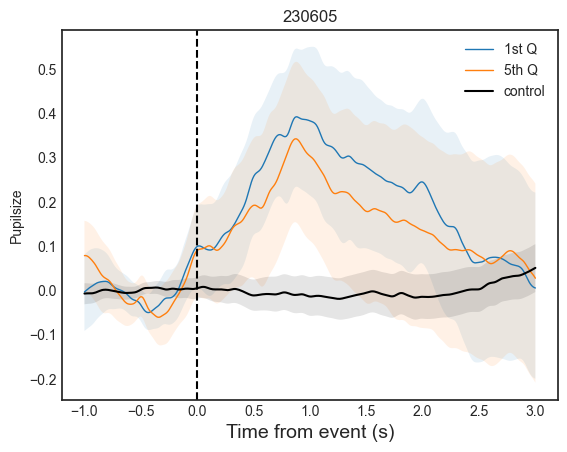

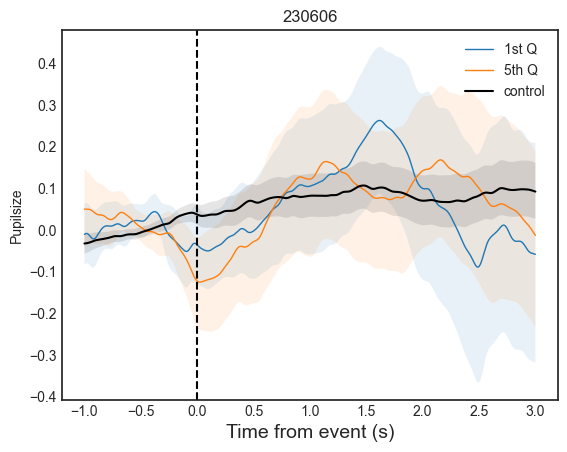

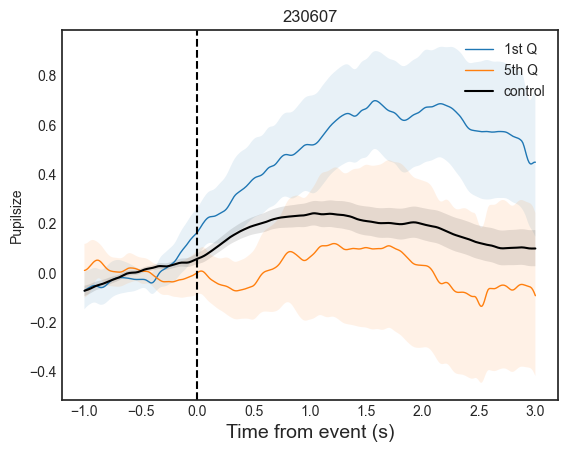

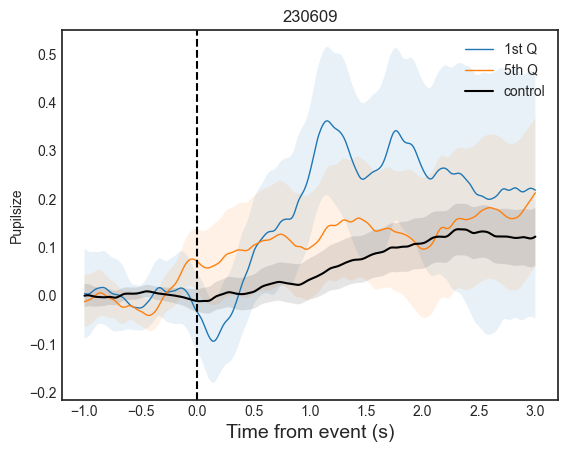

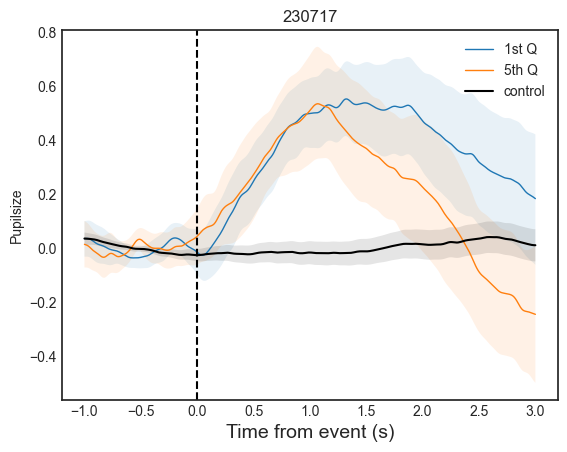

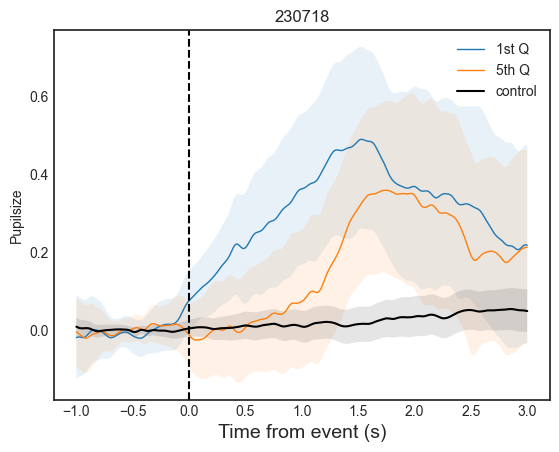

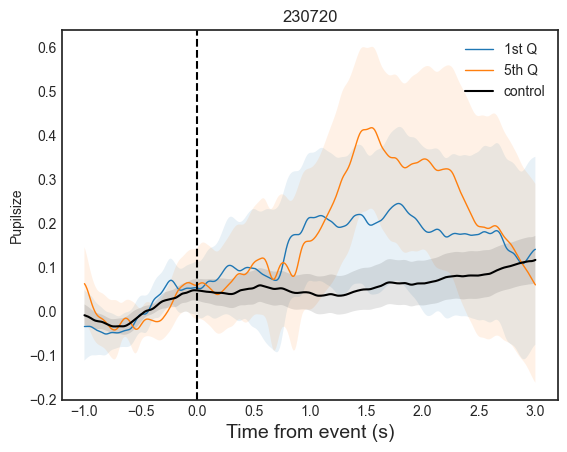

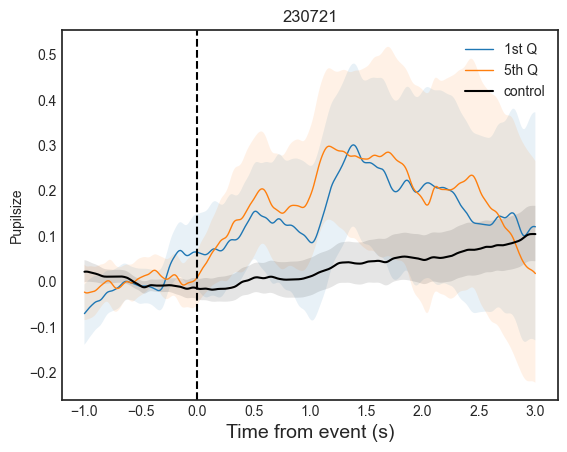

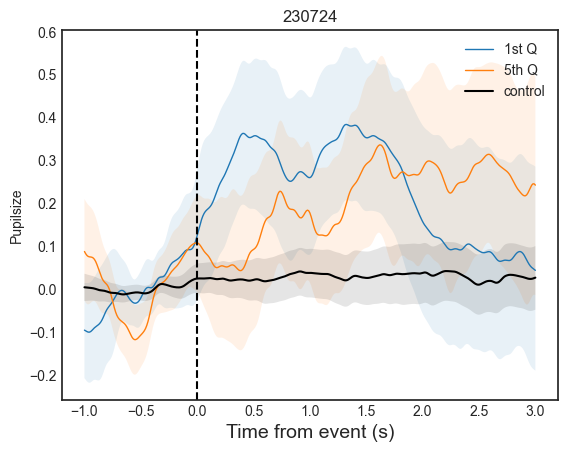

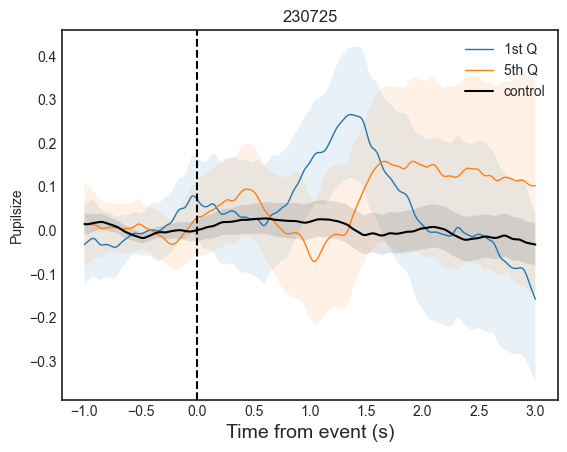

In [11]:
for d in p_rate_dates:
    fig,ax,_,_ = get_subset(run,run.aligned,'p_rate_local',{'date':d}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none']
                                                    )
    ax.set_title(f'{d}')

length input lists 3


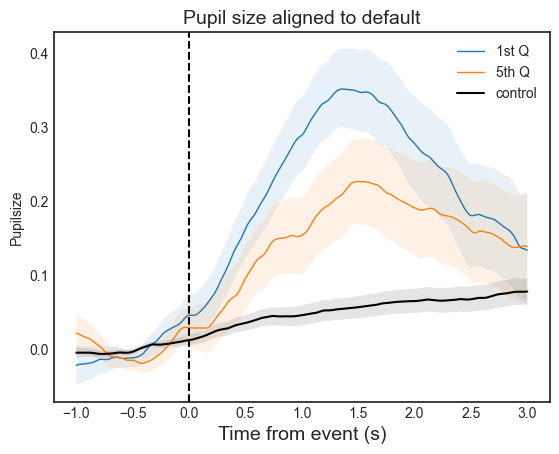

In [12]:

run.subsets['prate_rare_freq_2305'] = get_subset(run,run.aligned,'p_rate_local',{'date':p_rate_dates}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none']
                                                    )

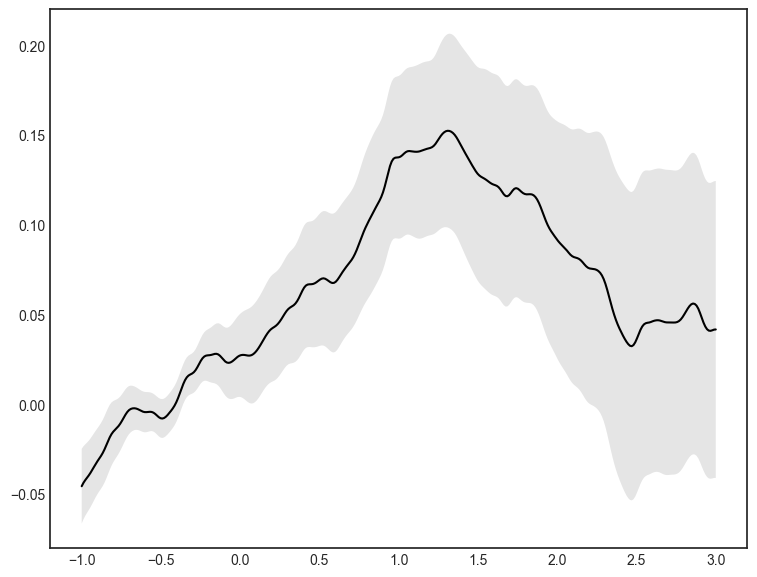

In [13]:
rare_freq_delta_tsplot = plt.subplots(figsize=(9,7))
rare_df, freq_df, none_df = copy(run.subsets['prate_rare_freq_2305'][2])
none_df.index = none_df.index.droplevel('time')
for df_i, (df,df_name) in enumerate(zip([rare_df,freq_df],['rare','frequent'])):
    df.index = df.index.droplevel('time')
    # for u_idx in df.index.unique():
        # df.loc[u_idx] = df.loc[u_idx] - none_df.loc[u_idx].median(axis=0)
delta_dfs = np.array([rare_df.loc[u_idx].mean(axis=0)-freq_df.loc[u_idx].mean(axis=0) for u_idx in rare_df.index.unique() if u_idx in freq_df.index])
# delta_means = [(rare_df.loc[u_idx]-freq_df.loc[u_idx]).mean(axis=0) for u_idx in rare_df.index.unique() if u_idx in freq_df.index]
rare_freq_delta_tsplot[1].plot(none_df.columns, delta_dfs.mean(axis=0),
                               c='black')
# plot_ts_var(none_df.columns,np.array(delta_dfs),f'black',rare_freq_delta_tsplot[1])
delta_sem = sem(delta_dfs,axis=0,nan_policy='omit')
rare_freq_delta_tsplot[1].fill_between(none_df.columns,delta_dfs.mean(axis=0)-delta_sem,delta_dfs.mean(axis=0)+delta_sem,
                                       fc='k', alpha=0.1)

In [14]:
p_rate_dates_01_first =
run.subsets['prate_rare_freq_2305'] = get_subset(run,run.aligned,'p_rate_local',{'date':p_rate_dates}, events=list_cond_filts['p_rate_local'][1],
                                                 exclude_idx=[1, 2, 3], ctrl_idx=3,alt_cond_names=['rare', 'frequent', 'none']
                                                    )

SyntaxError: invalid syntax (2592658216.py, line 1)

In [ ]:
run.dump_trial_pupil_arr()